In [0]:
# Импортируем нужные библиотеки

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error

In [0]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [0]:
def plot_difference(x, true_sequence, predict_values, unit):
    plt.figure(num=None, figsize=(15, 8), dpi=100, facecolor='w', edgecolor='k')
    plt.plot(x[n_steps:], predict_values[n_steps:], label="predicitons")
    plt.plot(x, true_sequence, label="ground truth")
    plt.plot(x[:n_steps], predict_values[:n_steps], label="initial sequence", color="red")
    plt.title(f'predictions of model with {unit} units')
    plt.legend(loc='upper left')
    plt.show()

# **Prediction of sine wave without noise**
## **Data generation**

In [0]:
def sin_wave_without_noise(start=-10, end=10, k=1, n_steps=5):
    # generate x
    x = np.arange(start*np.pi, end*np.pi, 0.1)
    
    # Generate y values as y = sin(k*x)
    y = np.sin(k*x)
        
    plt.figure(num=None, figsize=(15, 8), dpi=100, facecolor='w', edgecolor='k')
    plt.title('sin(kx)')
    plt.plot(x, y)
    
    X_train, y_train = split_sequence(y, n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    print(f'Размерность X_train: {X_train.shape}\ny_train: {y_train.shape}')
    
    return X_train, y_train

Размерность X_train: (609, 20, 1)
y_train: (609,)


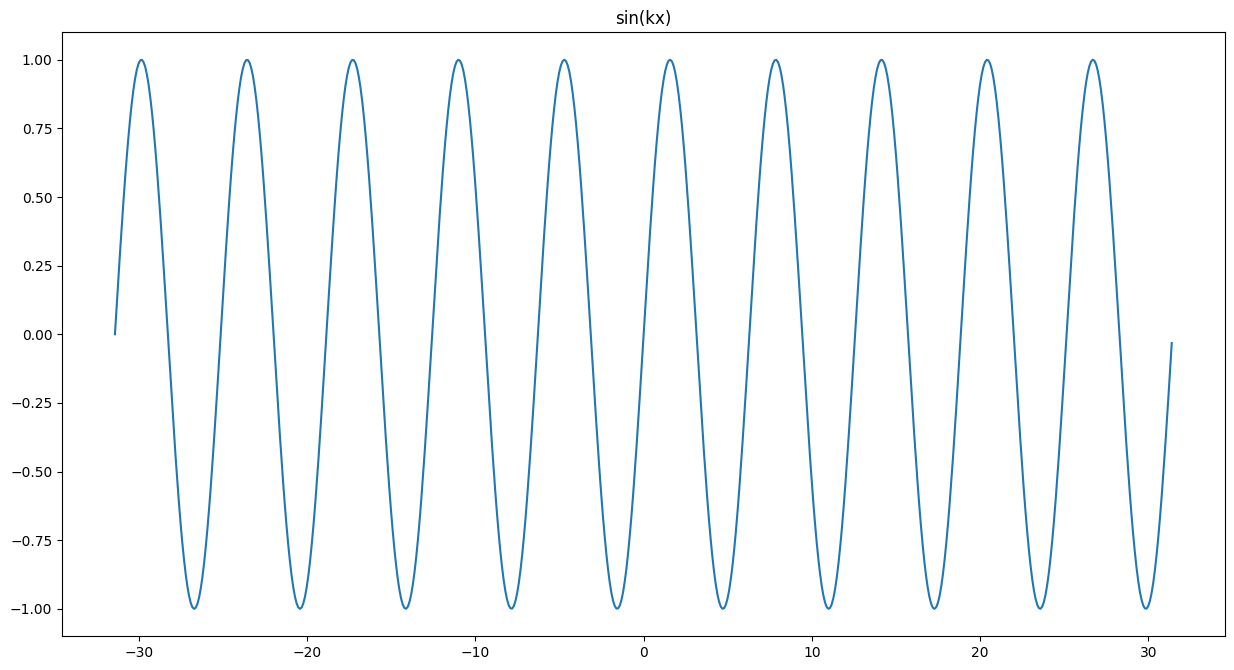

In [0]:
n_steps = 20
X_train, y_train = sin_wave_without_noise(n_steps=n_steps)

## **Model with one LSTM layer**

In [0]:
def predict(true_sequence, model):
    predict_values = true_sequence[:n_steps]
    k = n_steps
    length = true_sequence.size
    while k != length:
        X = predict_values[-n_steps::]
        X = X.reshape((1, n_steps, 1))
        f_x = model.predict(X, verbose=0)
        predict_values = np.append(predict_values, f_x)
        k += 1
    return predict_values

In [0]:
x = np.arange(30*np.pi, 35*np.pi, 0.1)
test_y = np.sin(x)

Units in LSTM layer: 1, loss: 0.4514


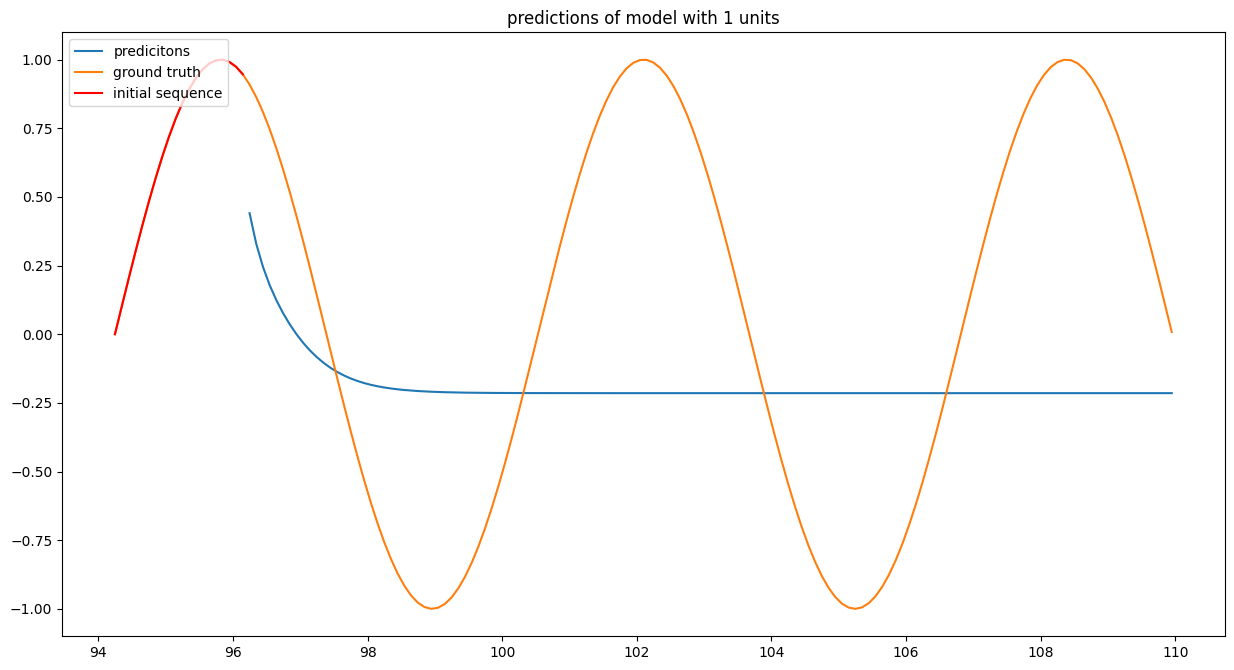

Units in LSTM layer: 2, loss: 0.7211
Units in LSTM layer: 3, loss: 0.1332


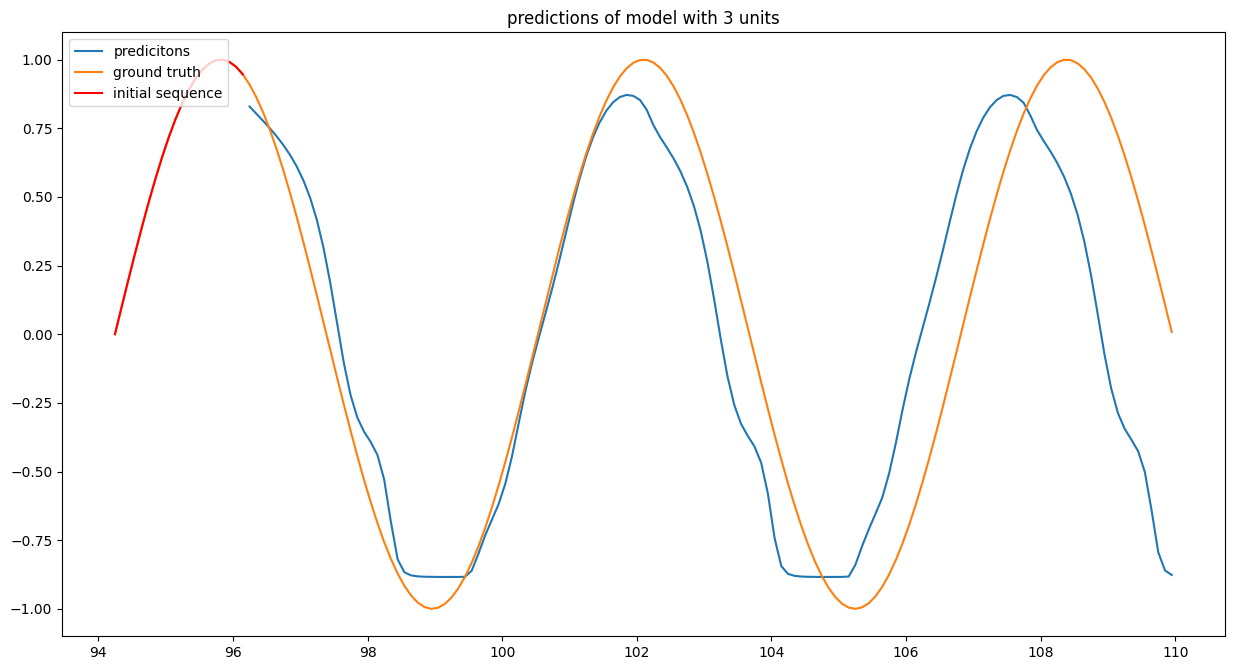

Units in LSTM layer: 4, loss: 0.0545
Units in LSTM layer: 5, loss: 0.0068


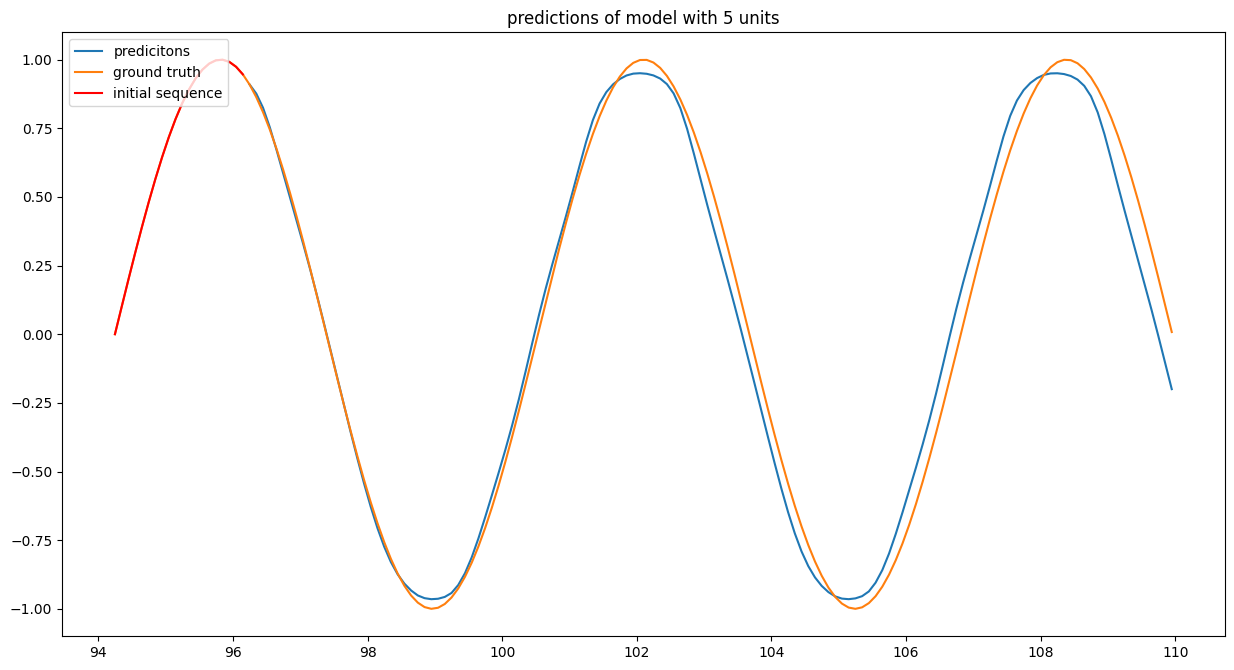

Units in LSTM layer: 6, loss: 0.0003
Units in LSTM layer: 7, loss: 0.0001
Units in LSTM layer: 8, loss: 0.0068


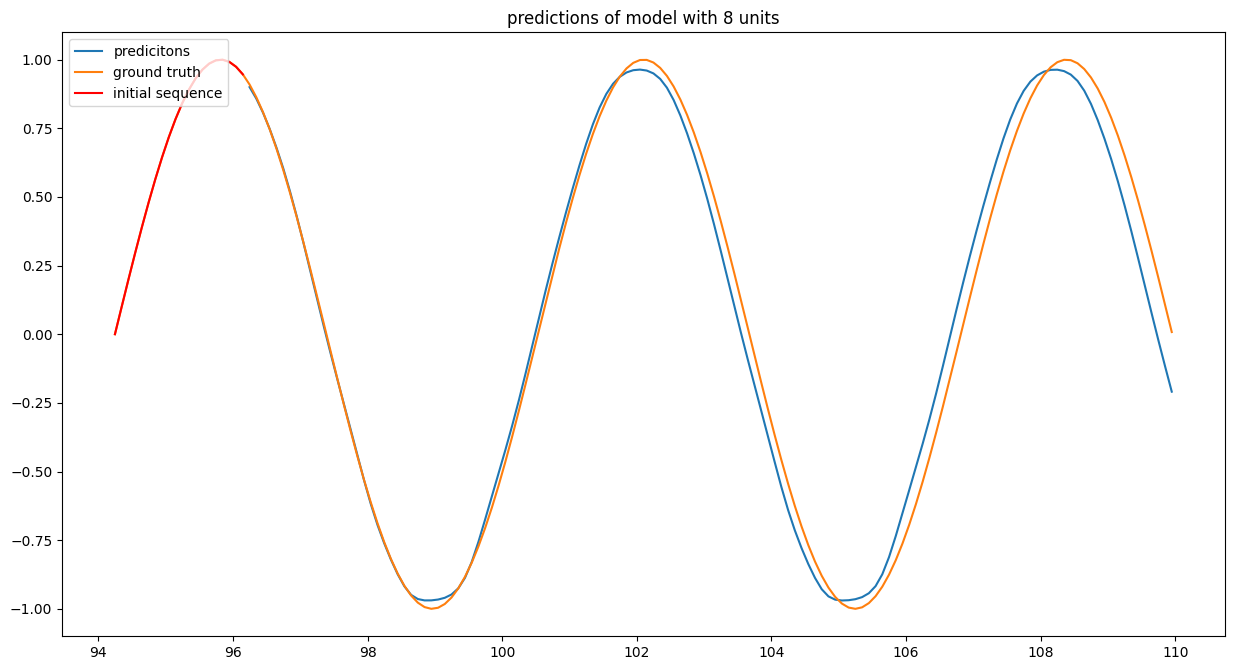

Units in LSTM layer: 9, loss: 0.008
Units in LSTM layer: 10, loss: 0.0017


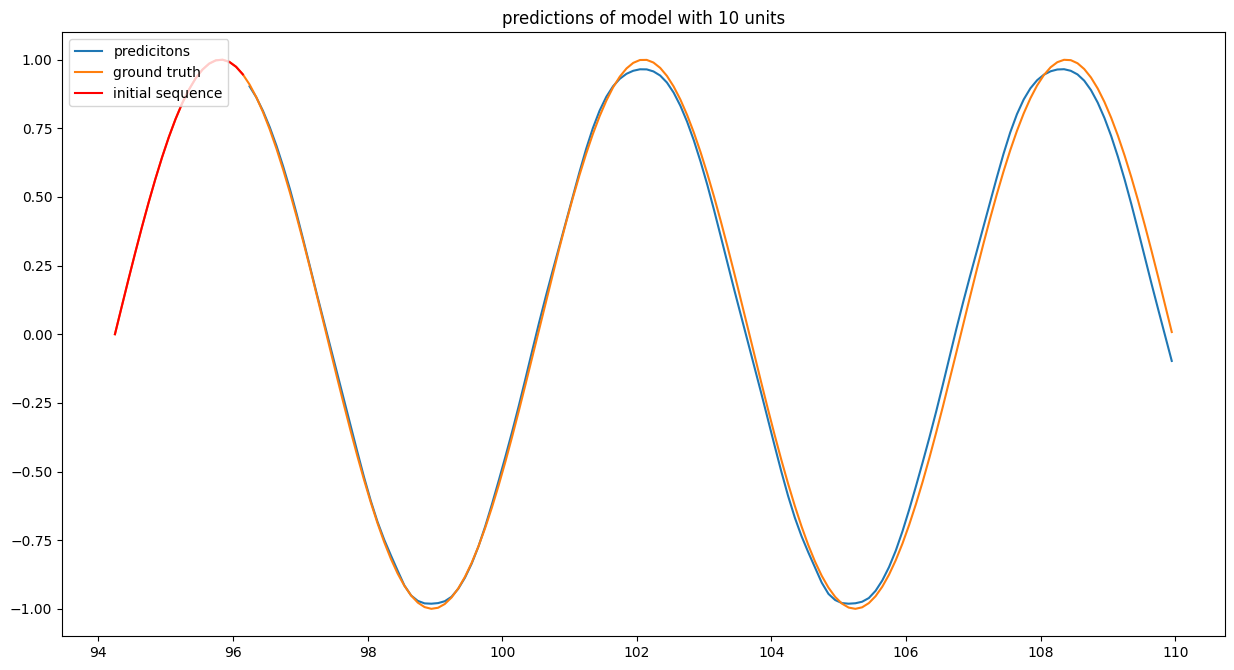

Units in LSTM layer: 11, loss: 0.0001
Units in LSTM layer: 12, loss: 0.0001
Units in LSTM layer: 13, loss: 0.0044
Units in LSTM layer: 14, loss: 0.001
Units in LSTM layer: 15, loss: 0.0003


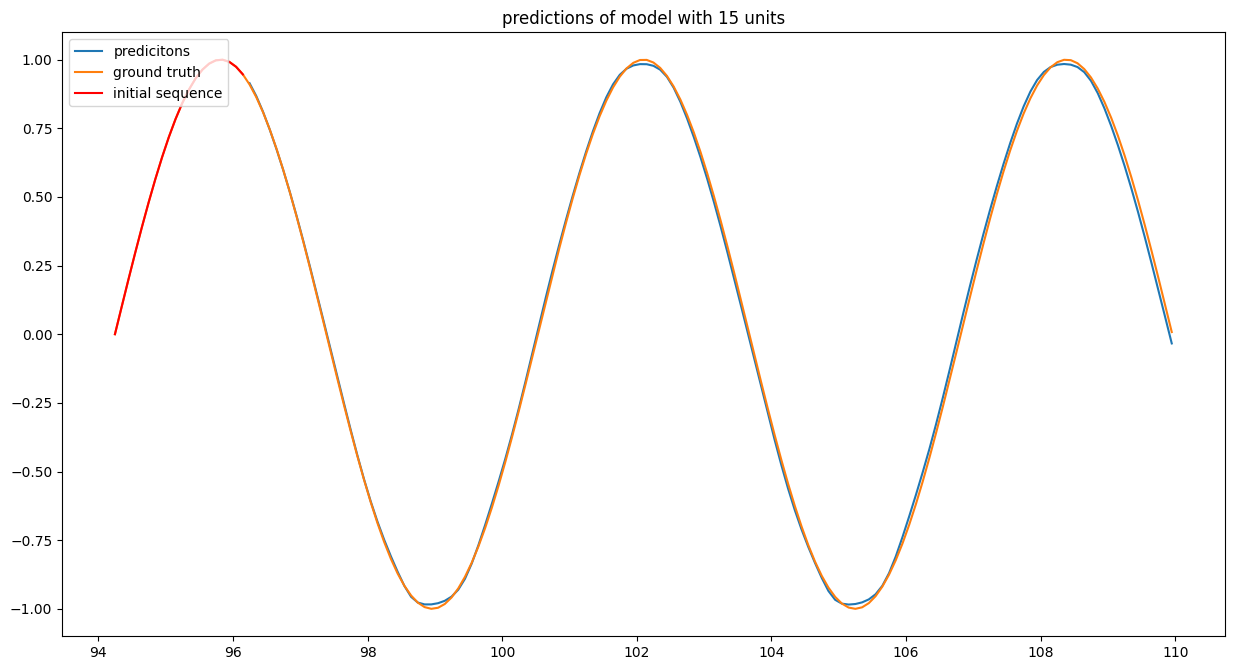

Units in LSTM layer: 16, loss: 0.0019
Units in LSTM layer: 17, loss: 0.0011
Units in LSTM layer: 18, loss: 0.0026
Units in LSTM layer: 19, loss: 0.0006
Units in LSTM layer: 20, loss: 0.0001


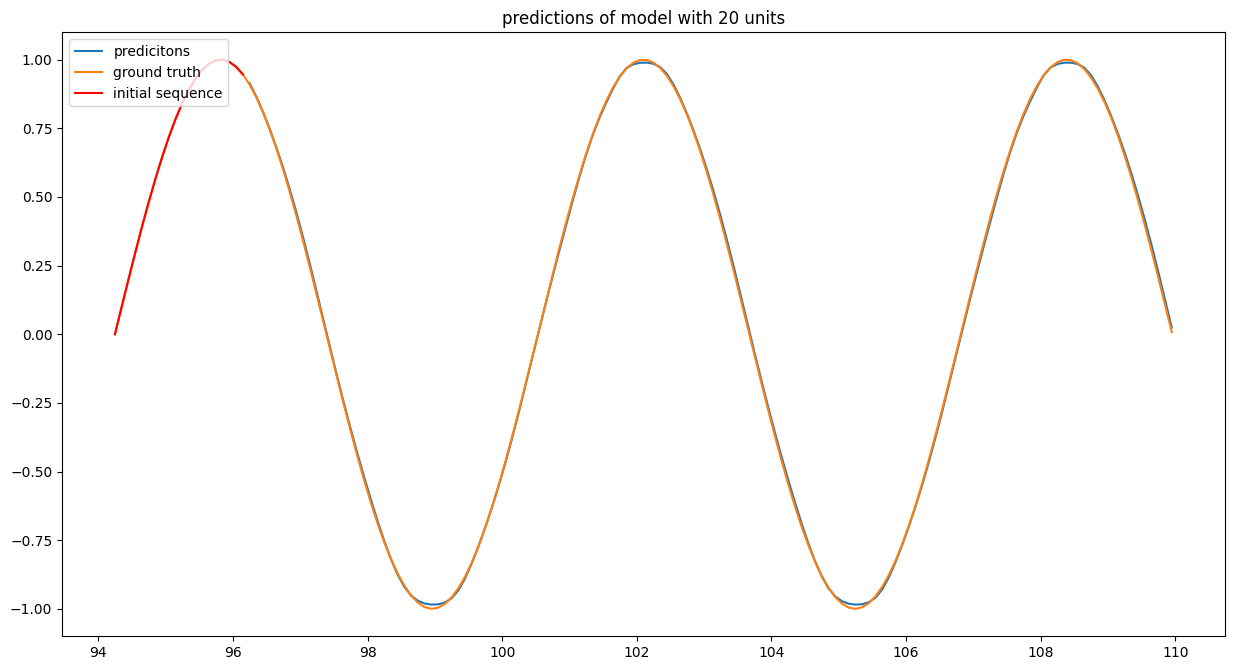

Units in LSTM layer: 21, loss: 0.0001
Units in LSTM layer: 22, loss: 0.0223
Units in LSTM layer: 23, loss: 0.0109
Units in LSTM layer: 24, loss: 0.0078
Units in LSTM layer: 25, loss: 0.0005


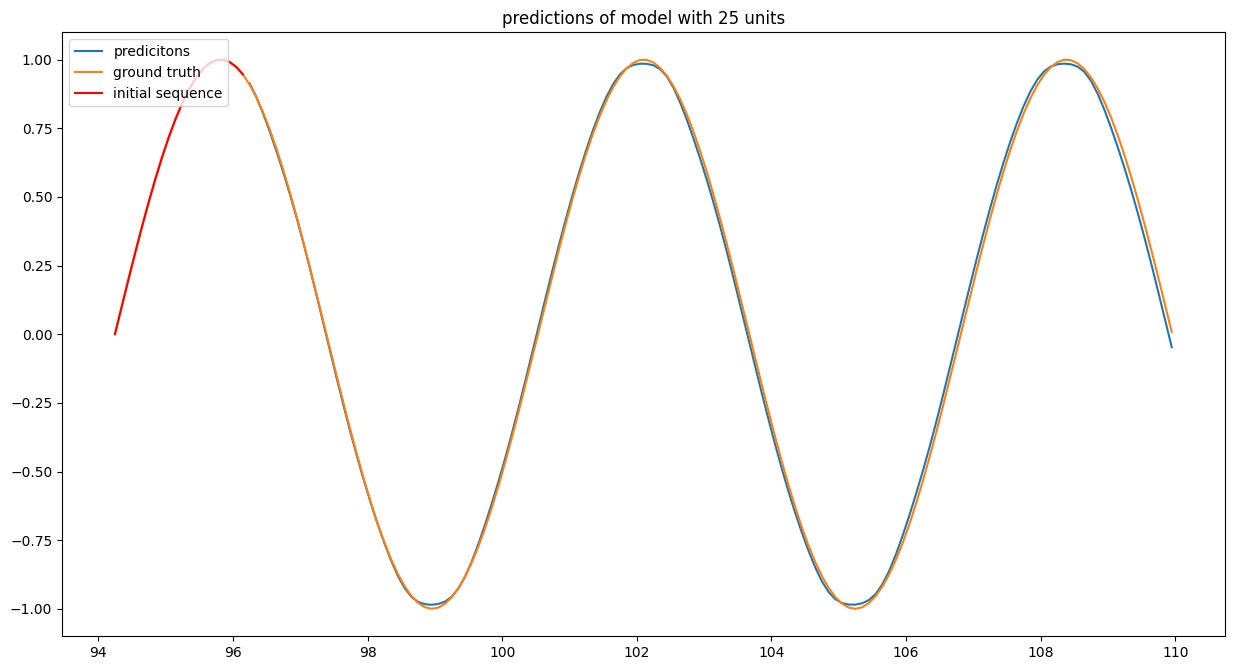

In [0]:
units_number = range(1, 26)
loss = []
min_loss = None
min_unit = None

for unit in units_number: 
    model = Sequential()
    model.add(LSTM(unit, activation='tanh', input_shape=(n_steps, 1)))
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=100, verbose=0)
    predict_y = predict(test_y, model)

    mse = mean_squared_error(test_y, predict_y)

    if min_loss is None or mse < min_loss:
        min_unit = unit
        min_loss = mse
        best_model = model
    loss.append(mse)
    
    print(f'Units in LSTM layer: {unit}, loss: {np.round(mse, 4)}')
    if unit in (1, 3, 5, 8, 10, 15, 20, 25):
        plot_difference(x, test_y, predict_y, unit)

min loss 5.258165584619567e-05, best number of units is 12
MSE is 0.0005728247471815327


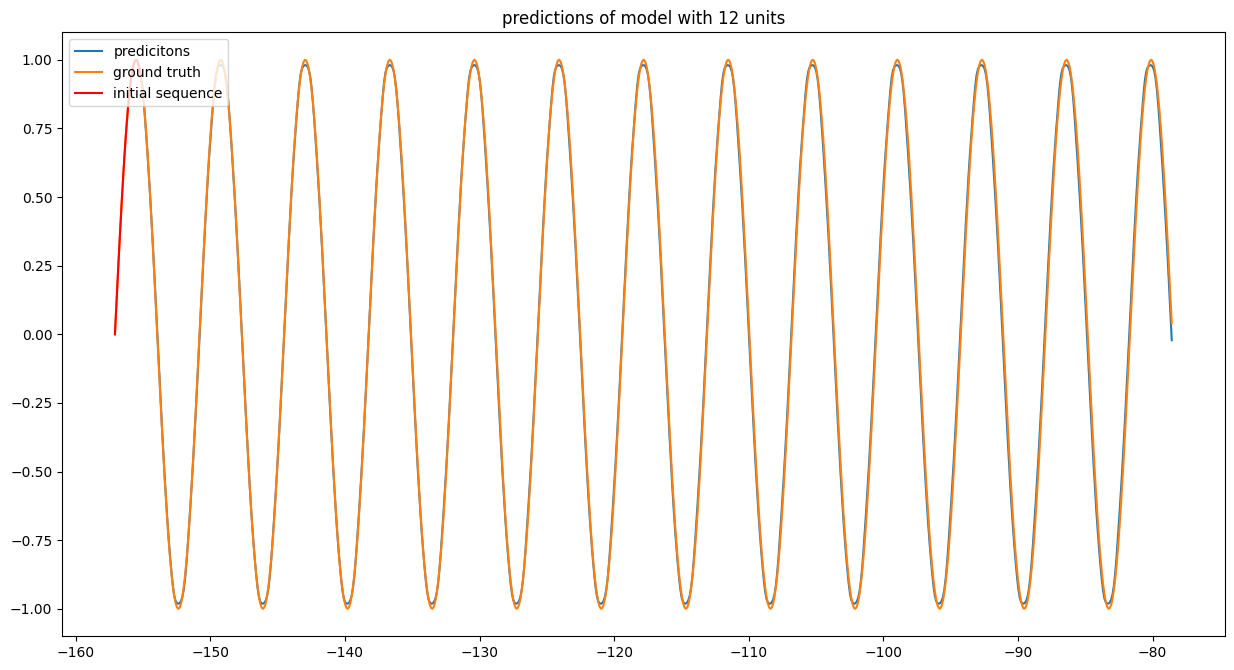

In [0]:
print(f'min loss {min_loss}, best number of units is {min_unit}')

x = np.arange(-50*np.pi, -25*np.pi, 0.1)
test_y = np.sin(x)
predict_y = predict(test_y, best_model)

print(f'MSE is {mean_squared_error(test_y, predict_y)}')
plot_difference(x, test_y, predict_y, min_unit)

# **Prediction of sine wave with noise**
## **Data  generation**

In [0]:
def sin_wave_with_noise(start=-10, end=10, k=1, n_steps=5, mu=0, sigma=3): # mu - mean, sigma - standard deviation
    # generate x
    x = np.arange(start*np.pi, end*np.pi, 0.1)
    
    # generate random noise
    e = np.random.normal(mu, sigma, x.size)
    
    # Generate y values as y = func(x) + e
    y = np.sin(k*x) + e
        
    plt.figure(num=None, figsize=(15, 8), dpi=100, facecolor='w', edgecolor='k')
    plt.title('sin(kx) with noise')
    plt.plot(x, y)
    
    X_train, y_train = split_sequence(y, n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    print(f'Размерность X_train: {X_train.shape}, y_train: {y_train.shape}')
    
    return X_train, y_train

Размерность X_train: (609, 20, 1), y_train: (609,)


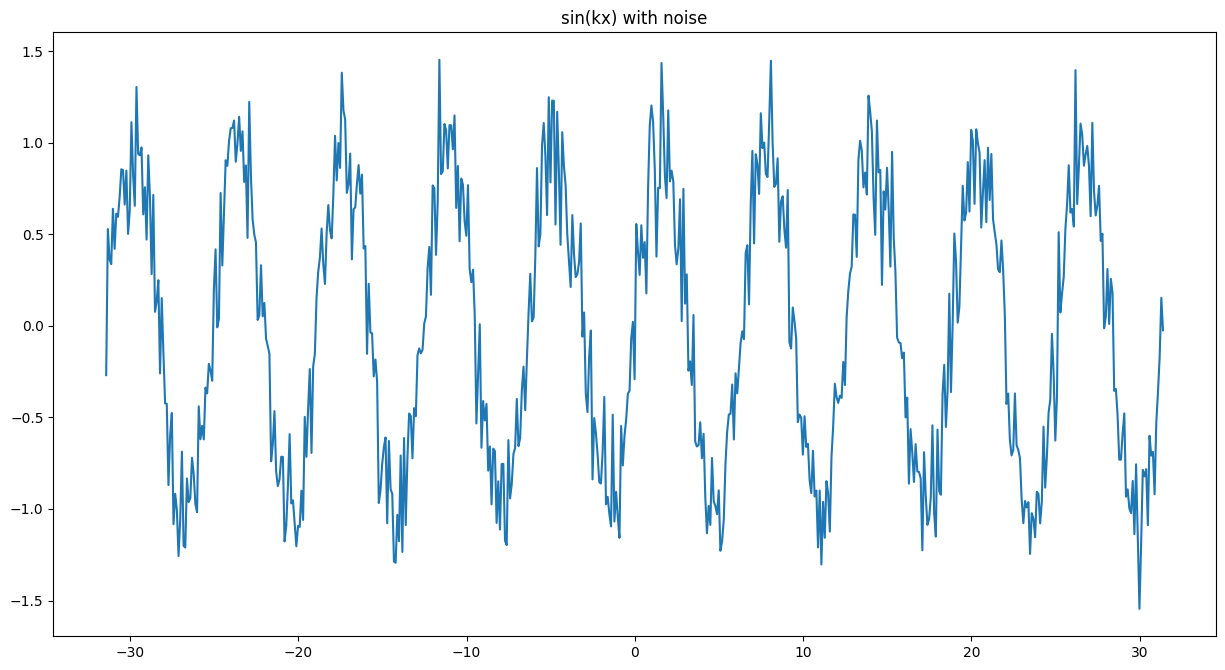

In [0]:
n_steps = 20
X_train, y_train = sin_wave_with_noise(n_steps=n_steps, sigma=0.2)

# **Model with one LSTM layer**

In [0]:
def generate_test_values(start=-5, end=5, k=1, mu=0, sigma=3):
    x = np.arange(start*np.pi, end*np.pi, 0.1)
    e = np.random.normal(mu, sigma, x.size)
    y = np.sin(k*x) + e
    return x, y

In [0]:
x, test_y = generate_test_values(start=30, end=35, sigma=0.2)

Units in layer: 1, loss: 0.6964
Units in layer: 2, loss: 0.3784
Units in layer: 3, loss: 0.7767


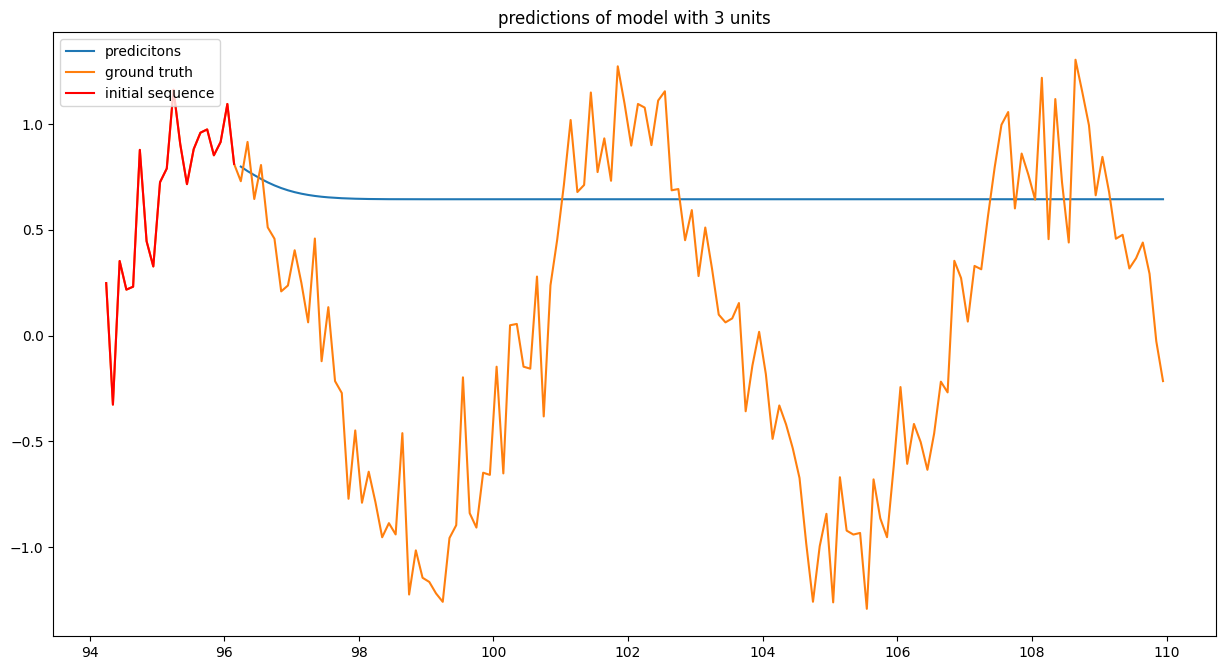

Units in layer: 4, loss: 0.5525
Units in layer: 5, loss: 0.089


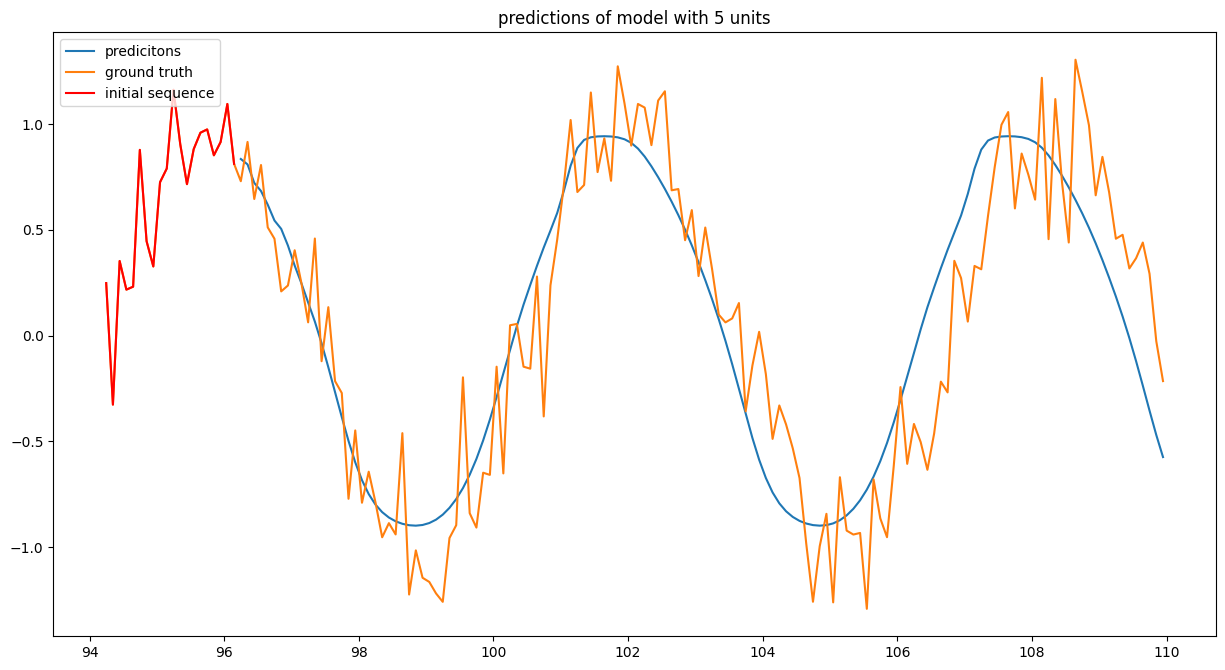

Units in layer: 6, loss: 0.0846
Units in layer: 7, loss: 0.0515
Units in layer: 8, loss: 0.0528


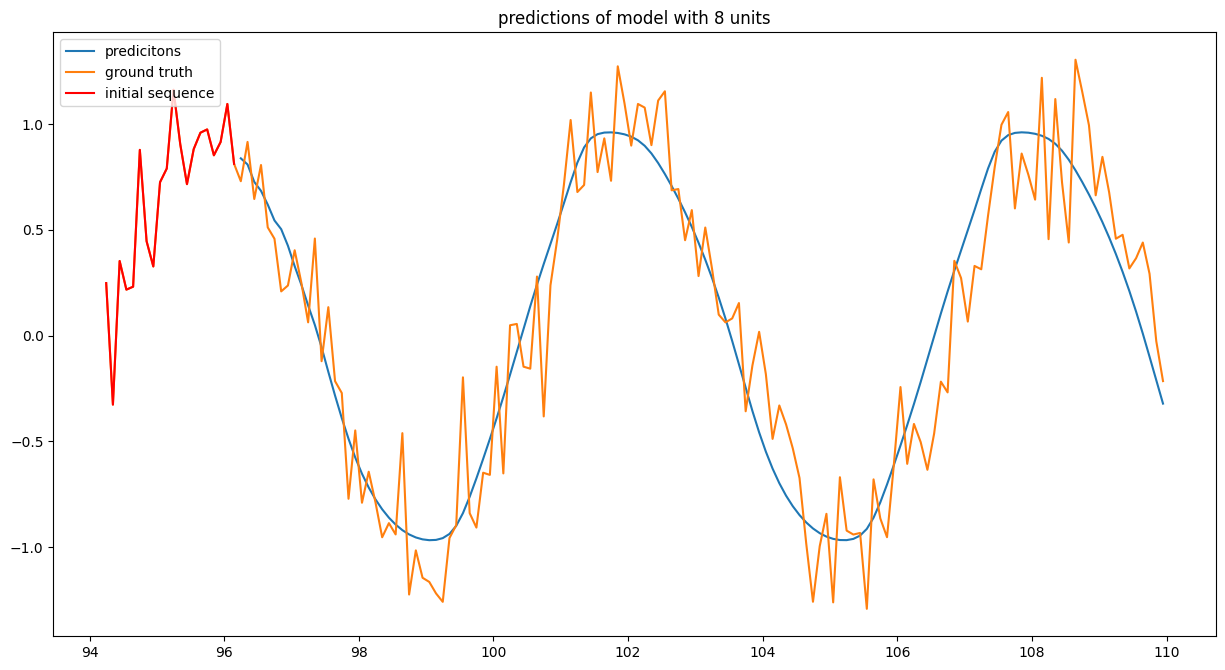

Units in layer: 9, loss: 0.0755
Units in layer: 10, loss: 0.1809


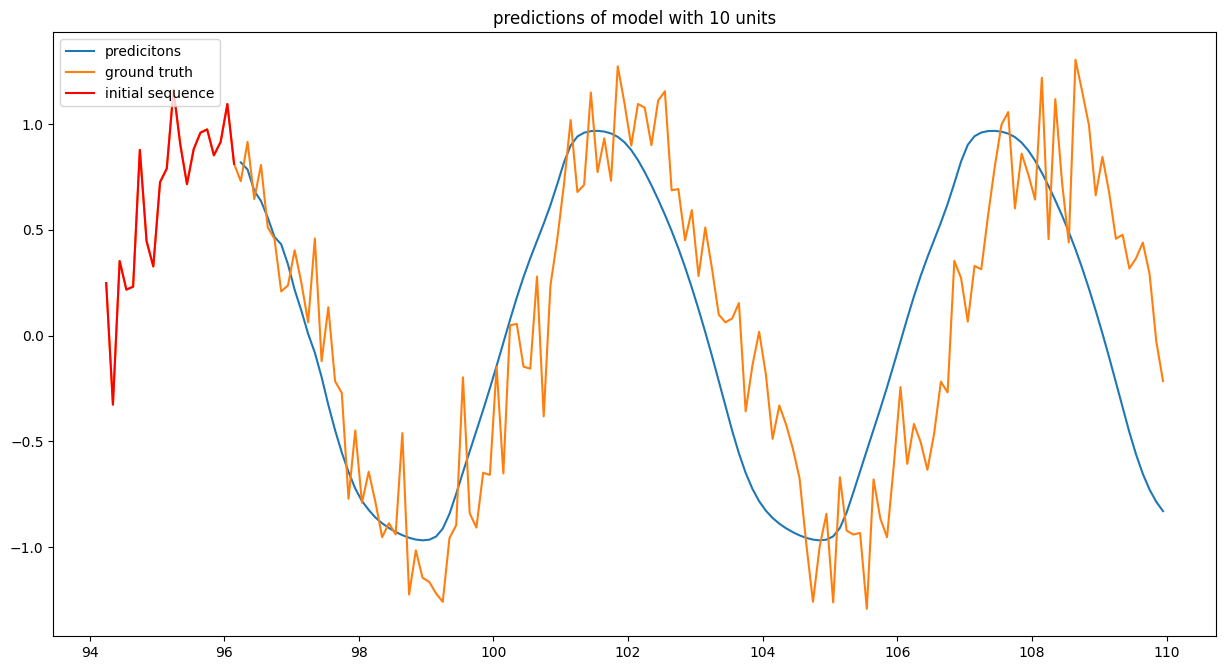

Units in layer: 11, loss: 0.0492
Units in layer: 12, loss: 0.0588
Units in layer: 13, loss: 0.053
Units in layer: 14, loss: 0.0441
Units in layer: 15, loss: 0.04


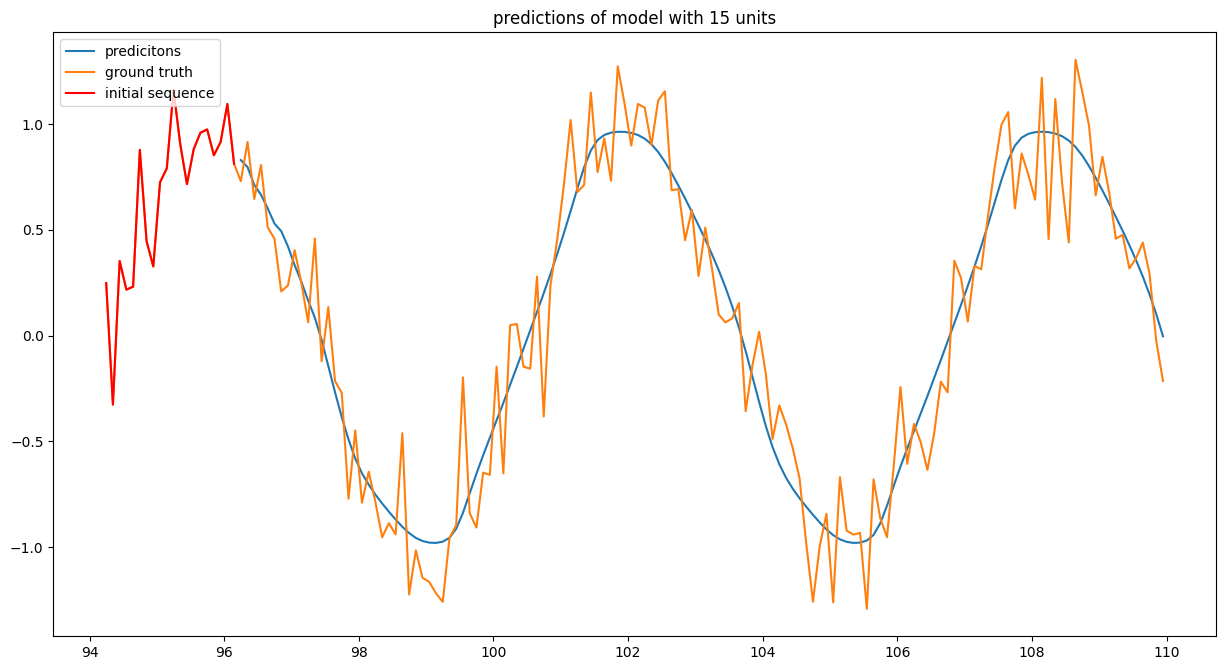

Units in layer: 16, loss: 0.0681
Units in layer: 17, loss: 0.0918
Units in layer: 18, loss: 0.0552
Units in layer: 19, loss: 0.2241
Units in layer: 20, loss: 0.0541


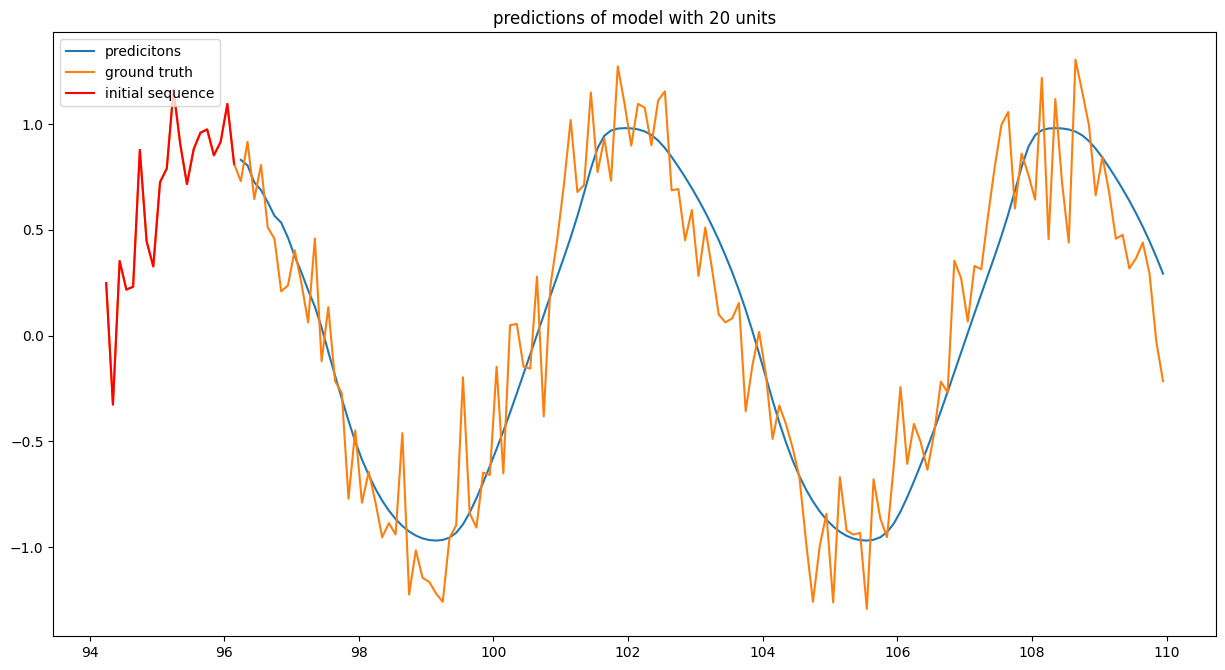

Units in layer: 21, loss: 0.0514
Units in layer: 22, loss: 0.0854
Units in layer: 23, loss: 0.0521
Units in layer: 24, loss: 0.1286
Units in layer: 25, loss: 0.0451


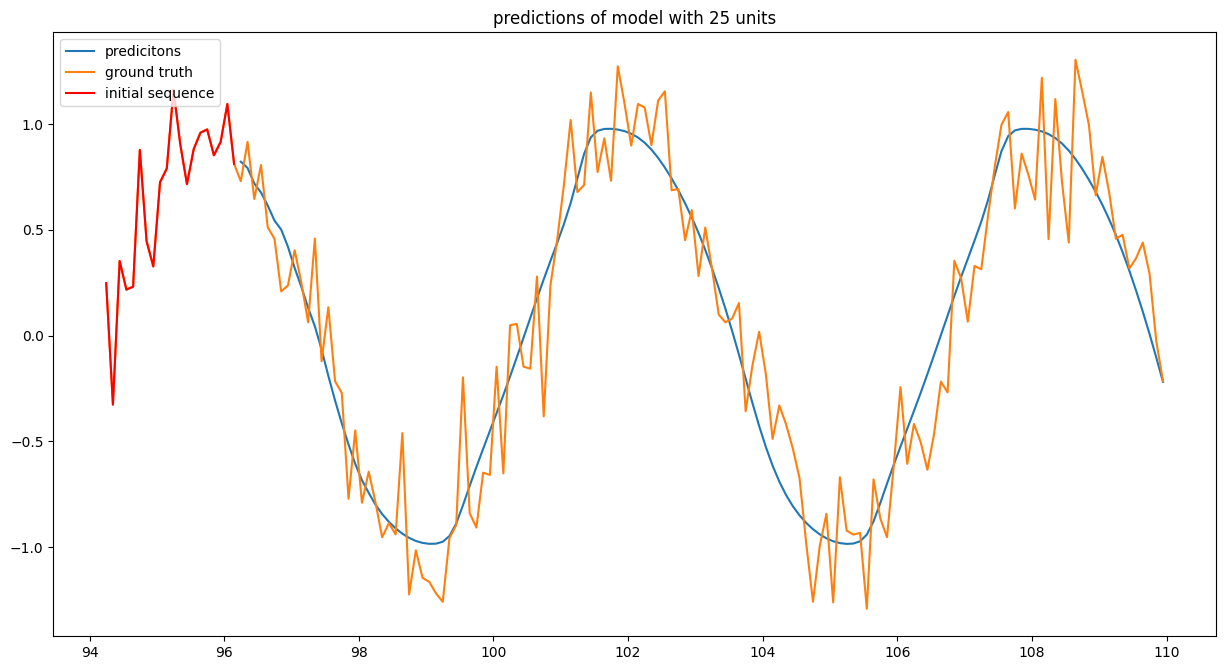

Units in layer: 26, loss: 0.1427
Units in layer: 27, loss: 0.0653
Units in layer: 28, loss: 0.3489
Units in layer: 29, loss: 0.1495
Units in layer: 30, loss: 0.0662


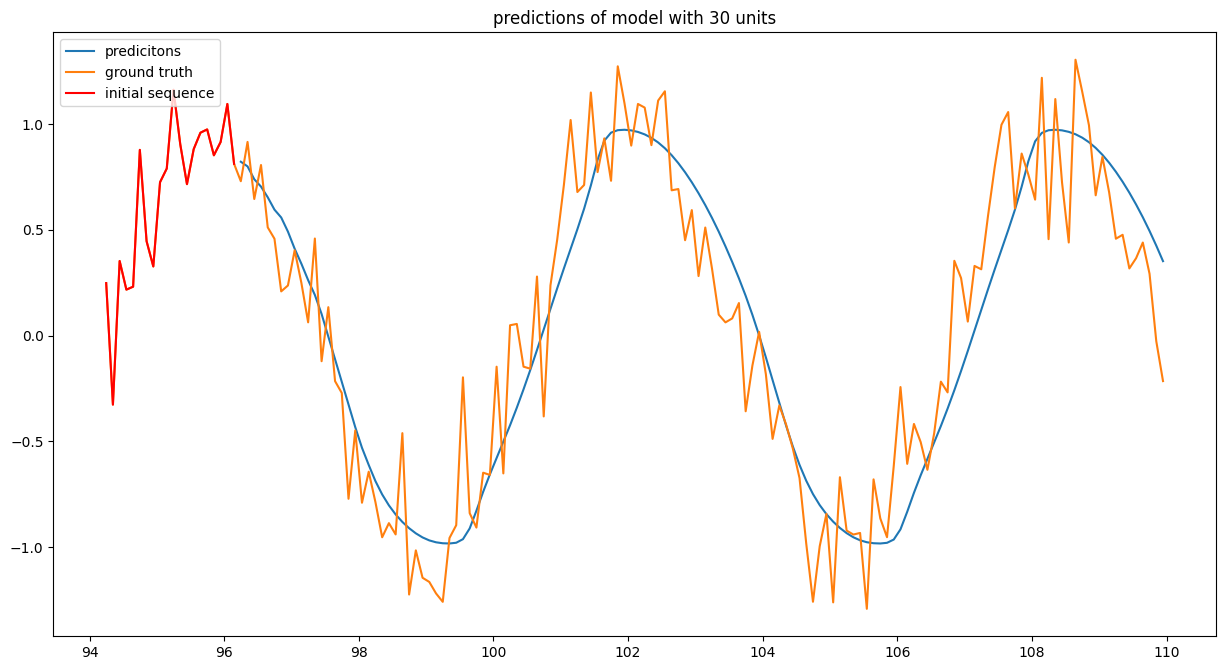

In [0]:
units_number = range(1, 31)
loss = []
min_loss = None
min_unit = None

for unit in units_number:
    model = Sequential()
    model.add(LSTM(unit, activation='tanh', input_shape=(n_steps, 1)))
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)
    predict_y = predict(test_y, model)

    mse = mean_squared_error(test_y, predict_y)

    if min_loss is None or mse < min_loss:
        min_loss = mse
        min_unit = unit
        best_model = model
    loss.append(mse)
    
    print(f'Units in layer: {unit}, loss: {np.round(mse, 4)}')
    if unit in (3, 5, 8, 10, 15, 20, 25, 30):
        plot_difference(x, test_y, predict_y, unit)

min loss 0.04003436802187512, best number of units is 15
MSE is 0.04343501212767173


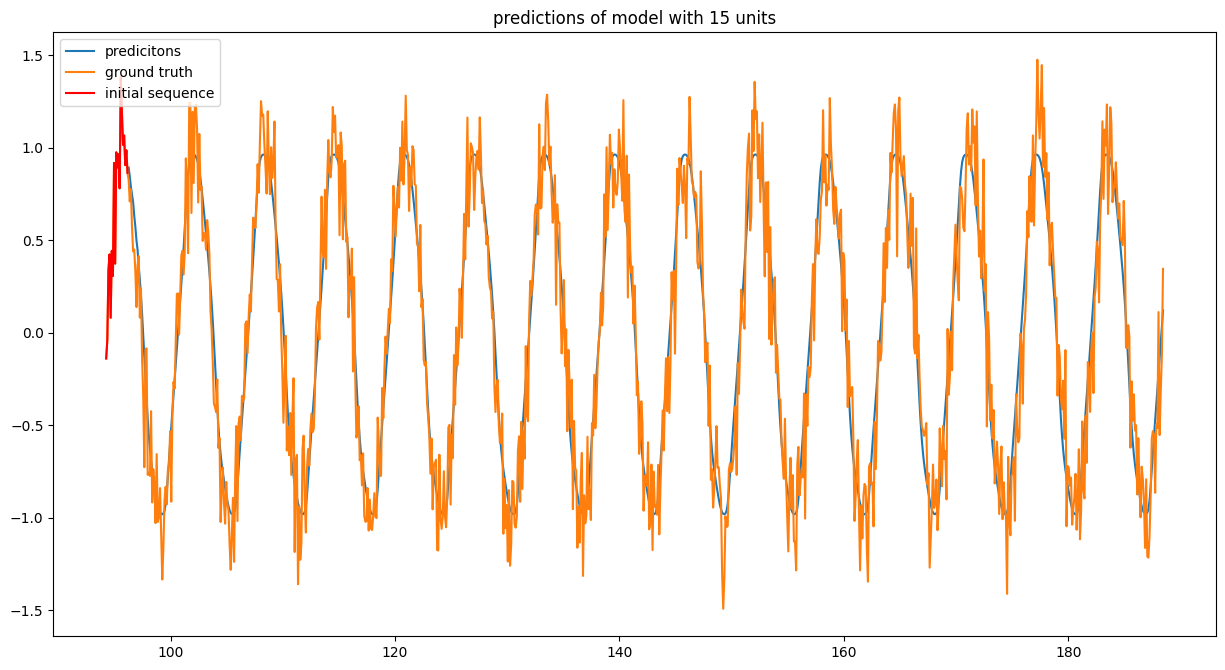

In [0]:
print(f'min loss {min_loss}, best number of units is {min_unit}')

x, test_y = generate_test_values(start=30, end=60, sigma=0.2)
predict_y = predict(test_y, best_model)

print(f'MSE is {mean_squared_error(test_y, predict_y)}')
plot_difference(x, test_y, predict_y, min_unit)